## Observations and Insights 

In [278]:
# Dependencies and Setup
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "/Users/eyris/Documents/Resources/Matplotlib_Challenge/Mouse_Metadata.csv"
study_results_path = "/Users/eyris/Documents/Resources/Matplotlib_Challenge/Study_Results.csv"

# Read the mouse data and the study results
mouse_metadata_df = pd.read_csv(mouse_metadata_path)
study_results_df = pd.read_csv(study_results_path)

In [43]:
mouse_metadata_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [44]:
study_results_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [64]:
# Combine the data into a single dataset
data_combo = study_results_df.merge(mouse_metadata_df, on= "Mouse ID")
data_combo.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [70]:
# Checking the number of mice in the DataFrame.
mice_count = data_combo.count()['Mouse ID']
mice_count

1893

In [66]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint and keep the most promising drugs
duplicate_ID = data_combo[data_combo['Mouse ID'] != 'g989']
duplicate_ID = data_combo[(data_combo["Drug Regimen"] == 'Capomulin') |
                          (data_combo["Drug Regimen"] == 'Infubinol') |
                          (data_combo["Drug Regimen"] == 'Ketapril') |
                          (data_combo["Drug Regimen"] == 'Placebo')
                         ]
duplicate_ID.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [69]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
drop_dupes = data_combo.drop_duplicates()
drop_dupes

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [71]:
# Checking the number of mice in the clean DataFrame.
mouse_count_clean = drop_dupes.count()['Mouse ID']
mouse_count_clean

1892

## Summary Statistics

In [84]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Determine the mean of the tumor volume
sum_stats = drop_dupes.groupby('Drug Regimen')
stats_table = sum_stats.agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]
stats_table.head()

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


In [87]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function.

means = drop_dupes.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
medians = drop_dupes.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
variances = drop_dupes.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
standards = drop_dupes.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
sems = drop_dupes.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']

new_stats = pd.DataFrame(means)
new_stats_2 = new_stats.rename(columns={"Tumor Volume (mm3)": "Mean"})

new_stats_2["Median"] = medians
new_stats_2["Variance"] = variances
new_stats_2["Std"] = standards
new_stats_2["SEM"] = sems

new_stats_2.head()

,Mean,Median,Variance,Std,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


## Bar Plots

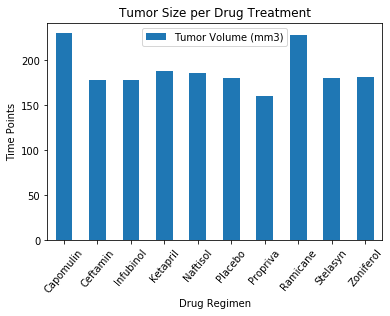

In [97]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout 
#the course of the study using pandas.

stat_plot = drop_dupes.groupby('Drug Regimen').count()['Tumor Volume (mm3)']
bar_chart = pd.DataFrame(stat_plot)

bar_chart_view = bar_chart.plot.bar(legend = True,rot=50)
bar_chart_view
plt.ylabel("Time Points")
plt.title("Tumor Size per Drug Treatment")
plt.savefig('barplot1')

In [98]:
bar_chart.head()

,Tumor Volume (mm3)
Drug Regimen,
Capomulin,230
Ceftamin,178
Infubinol,178
Ketapril,188
Naftisol,186


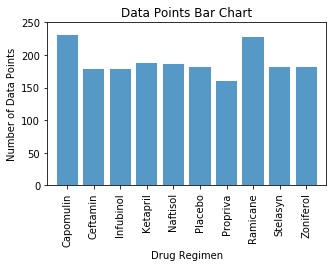

In [108]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

x_axis = np.arange(len(stat_plot))

tick_locations = [x for x in x_axis]

plt.figure(figsize=(5,3))

try_stats = bar_chart.reset_index()
try_stats

plt.bar(x_axis, bar_chart['Tumor Volume (mm3)'], alpha=0.75, align="center")
plt.xticks(tick_locations, try_stats['Drug Regimen'],rotation="vertical")

plt.xlim(-0.75, len(stat_plot)-.25)
plt.ylim(0, 250)

plt.title("Data Points Bar Chart")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")

plt.savefig('barplot2')
plt.show()

## Pie Plots

In [145]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_data = pd.DataFrame(drop_dupes.groupby(["Sex"]).count()).reset_index()
gender_data.head()

,Sex,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Age_months,Weight (g)
0,Female,934,934,934,934,934,934,934
1,Male,958,958,958,958,958,958,958


In [147]:
# Filter the DataFrame down only to those columns to chart
gender_data = gender_data[["Sex","Mouse ID"]]
gender_data = gender_data.rename(columns={"Mouse ID": "Count"})
gender_data.head()

,Sex,Count
0,Female,934
1,Male,958


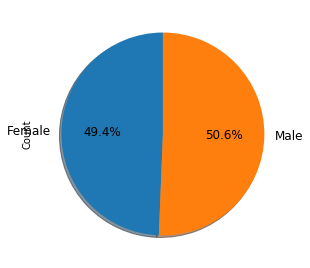

In [154]:
# plot chart
plt.figure(figsize = (10,6))
ax1 = plt.subplot(121, aspect='equal')
gender_df.plot(kind ='pie', y = "Count", ax=ax1, autopct='%1.1f%%', 
 startangle = 90, shadow = True, labels = gender_df['Sex'], legend = False, fontsize=12)

In [140]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
import matplotlib.pyplot as plt

# Group mice by male & female
gender_count = (drop_dupes.groupby(["Sex"])["Age_months"].count()).tolist()
gender_count

[934, 958]

([<matplotlib.patches.Wedge at 0x7fdab923c6d0>,
 [Text(-0.7895074328154627, -0.9037023921231689, 'Females'),
  Text(0.7237152243073347, 0.8283937916871327, 'Males')],
 [Text(-0.46054600247568656, -0.5271597287385151, '49.4%'),
  Text(0.3947537587130916, 0.4518511591020723, '50.6%')])

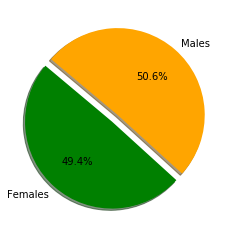

In [142]:
# Labels for the sections of our pie chart
labels = ["Females", "Males"]

# The colors of each section of the pie chart
colors = ["green", "orange"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0.1, 0)

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(gender_count, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

## Quartiles, Outliers and Boxplots

In [335]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
drop_dupes.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [336]:
# Sort data by Drug Regime, Mouse ID and Timepoint
sorted_data = drop_dupes.sort_values(["Drug Regimen", "Mouse ID", "Timepoint"], ascending=True)

# Select final volume of each mouse 
max_data = sorted_data.loc[sorted_data["Timepoint"] == 45]

max_data.head().reset_index()

,index,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,9,b128,45,38.982878,2,Capomulin,Female,9,22
1,1710,b742,45,38.939633,0,Capomulin,Male,7,21
2,1834,g288,45,37.074024,1,Capomulin,Male,3,19
3,1824,g316,45,40.159220,2,Capomulin,Female,22,22
4,1867,i557,45,47.685963,1,Capomulin,Female,1,24


In [337]:
# Select data for Capomulin regimen and reset index
cap_data = max_data[max_data['Drug Regimen'].isin(['Capomulin'])]
cap_data.head().reset_index()

,index,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,9,b128,45,38.982878,2,Capomulin,Female,9,22
1,1710,b742,45,38.939633,0,Capomulin,Male,7,21
2,1834,g288,45,37.074024,1,Capomulin,Male,3,19
3,1824,g316,45,40.159220,2,Capomulin,Female,22,22
4,1867,i557,45,47.685963,1,Capomulin,Female,1,24


In [338]:
# Convert column "Tumor Volume" of the Capomulin regimen into a dataframe object
cap_list = cap_data.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
cap_list = cap_list["Tumor Volume (mm3)"]
cap_list

0     23.343598
1     28.430964
2     28.484033
3     31.023923
4     31.896238
5     32.377357
6     33.329098
7     34.455298
8     36.041047
9     37.074024
10    37.311846
11    38.125164
12    38.846876
13    38.939633
14    38.982878
15    40.159220
16    40.658124
17    40.728578
18    41.483008
19    41.581521
20    47.685963
Name: Tumor Volume (mm3), dtype: float64

In [339]:
# If the data is in a dataframe, we use pandas to give quartile calculations
quartiles = cap_list.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of tumor volume is: {lowerq}")
print(f"The upper quartile of tumor volume is: {upperq}")
print(f"The interquartile range of tumor volume is: {iqr}")
print(f"The the median of tumor volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of tumor volume is: 32.37735684
The upper quartile of tumor volume is: 40.1592203
The interquartile range of tumor volume is: 7.781863460000004
The the median of tumor volume is: 37.31184577 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


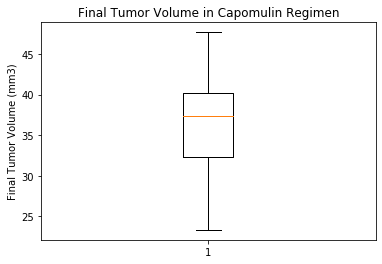

In [340]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume in Capomulin Regimen')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(cap_list)
plt.show()

In [309]:
# Select data for Ramicane regimen and reset index
ram_data = max_data[max_data['Drug Regimen'].isin(['Ramicane'])]
ram_data.head().reset_index()

,index,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,470,a411,45,38.407618,1,Ramicane,Male,3,22
1,480,a444,45,43.047543,0,Ramicane,Female,10,25
2,584,a520,45,38.810366,1,Ramicane,Male,13,21
3,554,a644,45,32.978522,1,Ramicane,Female,7,17
4,524,c758,45,33.397653,1,Ramicane,Male,9,17


In [310]:
# Sort data by Drug Regime, Mouse ID and Timepoint
sorted_data = ram_data.sort_values(["Drug Regimen", "Mouse ID", "Timepoint"], ascending=True)

# Select final volume of each mouse 
max_data = sorted_data.loc[sorted_data["Timepoint"] == 45]

max_data.head().reset_index()

,index,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,470,a411,45,38.407618,1,Ramicane,Male,3,22
1,480,a444,45,43.047543,0,Ramicane,Female,10,25
2,584,a520,45,38.810366,1,Ramicane,Male,13,21
3,554,a644,45,32.978522,1,Ramicane,Female,7,17
4,524,c758,45,33.397653,1,Ramicane,Male,9,17


In [311]:
# Convert column "Tumor Volume" of the Ramicane regimen into a dataframe object
ram_list = ram_data.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
ram_list =ram_list["Tumor Volume (mm3)"]
ram_list

0     22.050126
1     29.128472
2     30.276232
3     30.564625
4     30.638696
5     31.095335
6     31.560470
7     32.978522
8     33.397653
9     33.562402
10    36.134852
11    36.374510
12    37.225650
13    37.311236
14    38.407618
15    38.810366
16    40.659006
17    40.667713
18    43.047543
19    45.220869
Name: Tumor Volume (mm3), dtype: float64

In [312]:
# If the data is in a dataframe, we use pandas to give quartile calculations
quartiles = ram_list.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of tumor volume is: {lowerq}")
print(f"The upper quartile of tumor volume is: {upperq}")
print(f"The interquartile range of tumor volume is: {iqr}")
print(f"The the median of tumor volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of tumor volume is: 30.981175224999998
The upper quartile of tumor volume is: 38.508305307499995
The interquartile range of tumor volume is: 7.527130082499998
The the median of tumor volume is: 34.848627300000004 
Values below 19.690480101250003 could be outliers.
Values above 49.79900043124999 could be outliers.


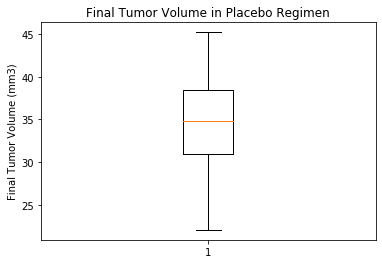

In [313]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume in Placebo Regimen')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(ram_list)
plt.show()

In [330]:
# Select data for Ceftamin regimen and reset index
cef_data = max_data[max_data['Drug Regimen'].isin(['Ceftamin'])]
cef_data.head().reset_index()

,index,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,1487,a275,45,62.999356,3,Ceftamin,Female,20,28
1,1394,j296,45,61.849023,3,Ceftamin,Female,24,30
2,1477,k210,45,68.923185,3,Ceftamin,Male,15,28
3,1354,l471,45,67.748662,1,Ceftamin,Female,7,28
4,1384,l661,45,59.851956,3,Ceftamin,Male,18,26


In [331]:
# Sort data by Drug Regime, Mouse ID and Timepoint
sorted_data = cef_data.sort_values(["Drug Regimen", "Mouse ID", "Timepoint"], ascending=True)

# Select final volume of each mouse 
max_data = sorted_data.loc[sorted_data["Timepoint"] == 45]

max_data.head().reset_index()

,index,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,1487,a275,45,62.999356,3,Ceftamin,Female,20,28
1,1394,j296,45,61.849023,3,Ceftamin,Female,24,30
2,1477,k210,45,68.923185,3,Ceftamin,Male,15,28
3,1354,l471,45,67.748662,1,Ceftamin,Female,7,28
4,1384,l661,45,59.851956,3,Ceftamin,Male,18,26


In [332]:
# Convert column "Tumor Volume" of the Ceftamin regimen into a dataframe object
cef_list = cef_data.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
cef_list = cef_list["Tumor Volume (mm3)"]
cef_list

0     59.741901
1     59.851956
2     61.386660
3     61.433892
4     61.849023
5     62.999356
6     64.299830
7     64.634949
8     64.729837
9     67.527482
10    67.748662
11    68.594745
12    68.923185
Name: Tumor Volume (mm3), dtype: float64

In [333]:
# If the data is in a dataframe, we use pandas to give quartile calculations
quartiles = cef_list.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of tumor volume is: {lowerq}")
print(f"The upper quartile of tumor volume is: {upperq}")
print(f"The interquartile range of tumor volume is: {iqr}")
print(f"The the median of tumor volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of tumor volume is: 61.43389223
The upper quartile of tumor volume is: 67.52748237
The interquartile range of tumor volume is: 6.093590140000003
The the median of tumor volume is: 64.29983003 
Values below 52.29350701999999 could be outliers.
Values above 76.66786758 could be outliers.


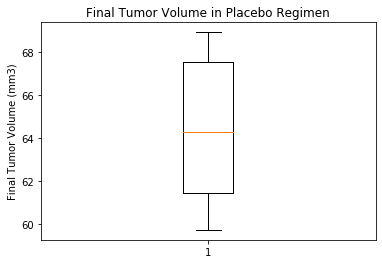

In [334]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume in Placebo Regimen')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(cef_list)
plt.show()

In [341]:
# Select data for Infubinol regimen and reset index
infu_data = max_data[max_data['Drug Regimen'].isin(['Infubinol'])]
infu_data.head().reset_index()

,index,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,907,a203,45,67.973419,2,Infubinol,Female,20,23
1,289,a251,45,65.525743,1,Infubinol,Female,21,25
2,1423,a685,45,66.083066,3,Infubinol,Male,8,30
3,224,c139,45,72.226731,2,Infubinol,Male,11,28
4,1459,e476,45,62.435404,1,Infubinol,Male,23,26


In [342]:
# Sort data by Drug Regime, Mouse ID and Timepoint
sorted_data = infu_data.sort_values(["Drug Regimen", "Mouse ID", "Timepoint"], ascending=True)

# Select final volume of each mouse 
max_data = sorted_data.loc[sorted_data["Timepoint"] == 45]

max_data.head().reset_index()

,index,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,907,a203,45,67.973419,2,Infubinol,Female,20,23
1,289,a251,45,65.525743,1,Infubinol,Female,21,25
2,1423,a685,45,66.083066,3,Infubinol,Male,8,30
3,224,c139,45,72.226731,2,Infubinol,Male,11,28
4,1459,e476,45,62.435404,1,Infubinol,Male,23,26


In [343]:
# Convert column "Tumor Volume" of the Ceftamin regimen into a dataframe object
infu_list = infu_data.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
infu_list = infu_list["Tumor Volume (mm3)"]
infu_list

0    60.918767
1    62.435404
2    62.754451
3    65.525743
4    66.083066
5    66.196912
6    67.685569
7    67.973419
8    72.226731
Name: Tumor Volume (mm3), dtype: float64

In [344]:
# If the data is in a dataframe, we use pandas to give quartile calculations
quartiles = infu_list.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of tumor volume is: {lowerq}")
print(f"The upper quartile of tumor volume is: {upperq}")
print(f"The interquartile range of tumor volume is: {iqr}")
print(f"The the median of tumor volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of tumor volume is: 62.75445141
The upper quartile of tumor volume is: 67.68556862
The interquartile range of tumor volume is: 4.9311172099999965
The the median of tumor volume is: 66.08306589 
Values below 55.35777559500001 could be outliers.
Values above 75.08224443499999 could be outliers.


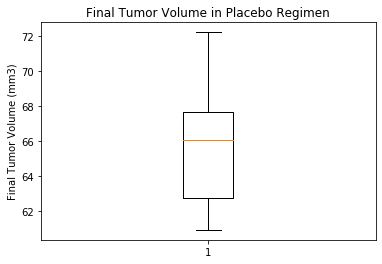

In [345]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume in Placebo Regimen')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(infu_list)
plt.show()

## Line and Scatter Plots

In [159]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
mouse_mean = drop_dupes.groupby(['Drug Regimen','Timepoint'])['Tumor Volume (mm3)'].mean()

mouse_reduce = mouse_mean.reset_index()
mouse_reduce = mouse_reduce.pivot(index='Timepoint',columns='Drug Regimen',values='Tumor Volume (mm3)')
mouse_reduce.head()

Drug Regimen,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,46.541247,47.389175,46.796098,47.125589,47.248967,43.944859,47.470830,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.335368,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.448025,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,53.970080,53.170334


In [160]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
sem_df = drop_dupes.groupby(['Drug Regimen','Timepoint'])['Tumor Volume (mm3)'].sem()
# Convert to DataFrame
sem_df=sem_df.reset_index()
# Preview DataFrame
sem_df.head()

,Drug Regimen,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [166]:
# Minor Data Munging to Re-Format the Data Frames
drop_dupes_format = sem_df.pivot(index='Timepoint',columns='Drug Regimen',values='Tumor Volume (mm3)')
# Preview that Reformatting worked
drop_dupes_format.head()

Drug Regimen,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.477067,0.264819,0.202385,0.218091,0.231708,0.482955,0.254830,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.461474,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.532904,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.684670,0.533182


In [170]:
drop_dupes_volume = mouse_reduce
drugs=list(mouse_reduce.columns)
for i in range(len(drugs)):
    round(mouse_volume[drugs[i]]*100/mouse_volume.iloc[0,i],1)

drop_dupes_volume.head()

Drug Regimen,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,46.541247,47.389175,46.796098,47.125589,47.248967,43.944859,47.470830,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.335368,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.448025,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,53.970080,53.170334


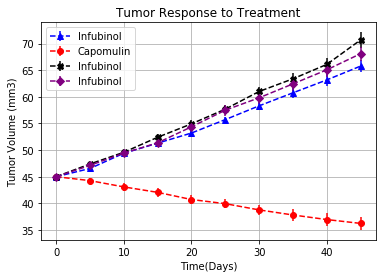

In [171]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
# Generate the Plot (with Error Bars)
x = drop_dupes_format.index
errorinfubinol = drop_dupes_format['Infubinol']
volinfubinol = drop_dupes_volume['Infubinol']
errorcapomulin = drop_dupes_format['Capomulin']
volincapomulin = drop_dupes_volume['Capomulin']
errorketapril = drop_dupes_format['Ketapril']
volinketapril = drop_dupes_volume['Ketapril']
errorplacebo = drop_dupes_format['Placebo']
volinplacebo = drop_dupes_volume['Placebo']

plt.errorbar(x,volinfubinol,errorinfubinol,label='Infubinol',color='Blue',fmt='^',linestyle='--')
plt.errorbar(x,volincapomulin,errorcapomulin,label='Capomulin',color='Red',fmt='o',linestyle='--')
plt.errorbar(x,volinketapril,errorketapril,label='Infubinol',color='Black',fmt='X',linestyle='--')
plt.errorbar(x,volinplacebo,errorplacebo,label='Infubinol',color='Purple',fmt='D',linestyle='--')
plt.grid()
plt.legend(loc='best')
plt.title('Tumor Response to Treatment')
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Time(Days)')
# Save the Figure
plt.savefig('Tumor Response To Treatment.png')

In [268]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

cap_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
9,b128,45,38.982878,2,Capomulin,Female,9,22
1710,b742,45,38.939633,0,Capomulin,Male,7,21
1834,g288,45,37.074024,1,Capomulin,Male,3,19
1824,g316,45,40.159220,2,Capomulin,Female,22,22
1867,i557,45,47.685963,1,Capomulin,Female,1,24


In [270]:
# Selecting only 3 columns
reduced_df = cap_data.loc[:, ["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]
reduced_df.head()

,Mouse ID,Weight (g),Tumor Volume (mm3)
9,b128,22,38.982878
1710,b742,21,38.939633
1834,g288,19,37.074024
1824,g316,22,40.159220
1867,i557,24,47.685963


In [271]:
# Calculate average tumor volume for each mouse in the Capomulin regimen
avg_cap = pd.DataFrame(reduced_df.groupby(["Mouse ID", "Weight (g)"])["Tumor Volume (mm3)"].mean()).reset_index()
avg_cap.head()

,Mouse ID,Weight (g),Tumor Volume (mm3)
0,b128,22,38.982878
1,b742,21,38.939633
2,g288,19,37.074024
3,g316,22,40.159220
4,i557,24,47.685963


In [272]:
# Rename Tumor Volume column
avg_cap = avg_cap.rename(columns={"Tumor Volume (mm3)": "Average Volume"})
avg_cap.head()

,Mouse ID,Weight (g),Average Volume
0,b128,22,38.982878
1,b742,21,38.939633
2,g288,19,37.074024
3,g316,22,40.159220
4,i557,24,47.685963


In [273]:
# Set the 'Mouse ID' as our index
avg_cap = avg_cap.set_index('Mouse ID')

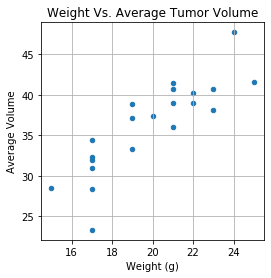

In [274]:
#Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
avg_cap.plot(kind="scatter", x="Weight (g)", y="Average Volume", grid=True, figsize=(4,4),
              title="Weight Vs. Average Tumor Volume")
plt.show()

## Correlation and Regression

In [276]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
mouse_weight = avg_cap.iloc[:,0]
avg_tumor_volume = avg_cap.iloc[:,1]
correlation = st.pearsonr(mouse_weight,avg_tumor_volume)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.85


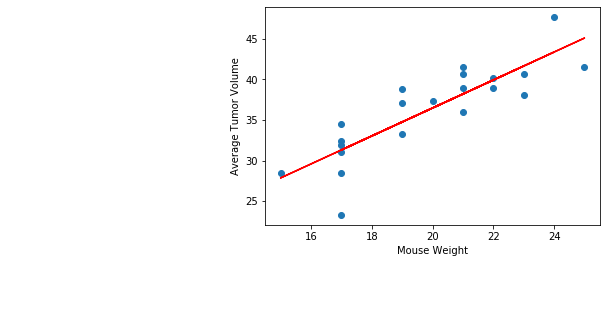

In [279]:
# Add the linear regression equation and line to plot
x_values = avg_cap['Weight (g)']
y_values = avg_cap['Average Volume']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Mouse Weight')
plt.ylabel('Average Tumor Volume')
plt.show()